
# Netzwerkvisualisierung

In diesem JupyterNotebook zeigen wir euch, wie man ein Netzwerk visualisiert und analysiert. Wir machen dies am Beispiel der Konsortien, die sich bei der Nationalen Forschungsdateninfrastrukturinitiative (NFDI) beteiligen bzw. beworben haben.

Als Datengrundlage nehmen wir die *Letters of Intent* der jeweiligen Konsortien, in denen Kooperationspartner genannt werden. Diese Nennungen sind Ausgangspunkt unseres Netzwerkes[^1].


Die Visualisierung machen wir in einem JupyterNotebook bzw. R Notebook[^2], sodass keine lokale Installation von R notwendig ist. 
JupyterNotebooks sind so aufgebaut, dass man verschiedene Zellen hat, in die man Code schreibt (in unserem Fall `R`-Code).
Um die Zelle mit dem Code auszuführen, können wir im Menü auf "*Cell*" und "*Run Cells*" klicken.
Oder mit dem Cursor in die Zelle klicken und anschließend gleichzeitig *SHIFT*" und "*ENTER*" drücken.
Ihr seht dann das Ergebnis des Codes direkt unter der Zelle angezeigt.

[^1]: Siehe dazu auch das Repositorium von Dorothea Strecker (https://github.com/dorothearrr/NFDI_Netzwerk), in dem sie bereits eine ähnliche Visualisierung und Analyse vorgenommen hat.

[^2]: https://rnotebook.io vgl. https://bookdown.org/yihui/rmarkdown/notebook.html

Bevor wir loslegen, möchten wir noch ein paar Begriffe klären.
Ein Netzwerk besteht aus zwei Komponenten:

* Knoten (Kreis)
* Kanten (Balken)

Knoten (*nodes* oder *vertices*) werden als Kreise dargestellt und repräsentieren Konsortien. Kanten (*edges*) werden als mehr oder minder gebogene Balken dargestellt und gehen von den Knoten aus. Sie zeigen eine Verbindung zwischen zwei Knoten an. 

![Komponenten eines Netzwerks. Erstellt von ÉD.](img/Einheitskreis_Gestalt.png)

R ist so aufgebaut, dass verschiedene Bibliotheken für unterschiedliche Funktionen geladen werden können.
Für die Netzwerkanalyse werden wir auf das Paket `igraph`[^2b] zurückgreifen.
Mit `library('igraph')` laden wir das Paket. 

[^2b]: https://igraph.org/r/

In [3]:
#install.packages('igraph')
library('igraph')

## Der Datensatz

Die Datengrundlage ist eine zweispaltige Auflistung der Konsortien.
In der ersten Spalte (`from`) steht das Konsortium, dessen *Letter of Intent* ausgewertet wird. In der zweiten Spalte (`to`) steht das Konsortium, das als Kooperationspartner genannt wird.

Diese Daten werden mittels der Funktion `read.table` eingelesen.
Es gibt drei Parameter:

* `header=TRUE` (es gibt eine Kopfzeile im Datensatz)
* `sep=","` (die Trennung der Werte erfolgt durch ein Komma)
* `text=""` (die Werte selbst stehen zwischen den Anführungszeichen)
  
Diese Werte übergeben wir der selbstgewählten Variable `NFDI_edges` , was mit dem nach links weisenden Pfeilsymbol erfolgt.

```{R}
NFDI_edges <- read.table(header=TRUE,
                         sep=",",
                         text="...")
```
Die Daten selbst kommen von dem GitHub-Gist [nfdi-collaborations.csv](https://gist.github.com/LukasCBossert/9bd04115db3aa9ed974fdc69d3ff227c)                     

In [25]:
NFDI_edges <- read.table(header=TRUE,
                         sep=",",
                         text="
from,to
DataPLANT,NFDI4BioDiversity
DataPLANT,NFDI4Chem
GHGA,NFDI4Health
KonsortSWD,BERD@NFDI
KonsortSWD,NFDI4BioDiversity
KonsortSWD,NFDI4Earth
KonsortSWD,NFDI4Health
KonsortSWD,Text+
NFDI4BioDiversity,NFDI4Earth
NFDI4BioDiversity,NFDI4Chem
NFDI4BioDiversity,NFDI4Health
NFDI4BioDiversity,KonsortSWD
NFDI4BioDiversity,DataPLANT
NFDI4Cat,FAIRmat
NFDI4Cat,NFDI4Chem
NFDI4Cat,NFDI4Ing
NFDI4Cat,DAPHNE4NFDI
NFDI4Chem,FAIRmat
NFDI4Chem,NFDI4Ing
NFDI4Chem,NFDI4Cat
NFDI4Chem,DAPHNE4NFDI
NFDI4Chem,PUNCH
NFDI4Chem,NFDI4Health
NFDI4Chem,NFDI4BioDiversity
NFDI4Culture,Text+
NFDI4Culture,MaRDI
NFDI4Culture,NFDI4Ing
NFDI4Health,GHGA
NFDI4Health,KonsortSWD
NFDI4Health,NFDI4Chem
NFDI4Health,NFDI4Earth
NFDI4Health,NFDI4BioDiversity
NFDI4Ing,NFDI-MatWerk
NFDI4Ing,FAIRmat
NFDI4Ing,NFDI4Chem
NFDI4Ing,NFDI4Earth
NFDI4Ing,MaRDI
NFDI4Ing,Text+
NFDI4Ing,NFDI4Culture
BERD@NFDI,KonsortSWD
BERD@NFDI,MaRDI
BERD@NFDI,Text+
DAPHNE4NFDI,FAIRmat
DAPHNE4NFDI,NFDI-MatWerk
DAPHNE4NFDI,NFDI4Cat
DAPHNE4NFDI,NFDI4Chem
DAPHNE4NFDI,NFDI4Health
DAPHNE4NFDI,NFDI4Ing
DAPHNE4NFDI,PUNCH
FAIRmat,DAPHNE4NFDI
FAIRmat,DataPLANT
FAIRmat,MaRDI
FAIRmat,NFDI-MatWerk
FAIRmat,NFDI4Cat
FAIRmat,NFDI4Chem
FAIRmat,DataScience
FAIRmat,NFDI4Ing
FAIRmat,PUNCH
MaRDI,BERD@NFDI
MaRDI,FAIRmat
MaRDI,NFDI-MatWerk
MaRDI,NFDI4Cat
MaRDI,NFDI4Chem
MaRDI,NFDI4Ing
MaRDI,PUNCH
NFDI-MatWerk,DAPHNE4NFDI
NFDI-MatWerk,DataPLANT
NFDI-MatWerk,FAIRmat
NFDI-MatWerk,MaRDI
NFDI-MatWerk,NFDI4Chem
NFDI-MatWerk,DataScience
NFDI-MatWerk,NFDI4Ing
DataScience,KonsortSWD
DataScience,MaRDI
DataScience,NFDI-MatWerk
DataScience,NFDI4BioDiversity
DataScience,NFDI4Cat
DataScience,NFDI4Chem
DataScience,NFDI4Culture
DataScience,NFDI4Health
DataScience,NFDI4Ing
DataScience,NFDI4Microbiota
NFDI4Earth,DataPLANT
NFDI4Earth,GHGA
NFDI4Earth,KonsortSWD
NFDI4Earth,NFDI4BioDiversity
NFDI4Earth,NFDI4Cat
NFDI4Earth,NFDI4Chem
NFDI4Earth,NFDI4Culture
NFDI4Earth,NFDI4Health
NFDI4Earth,NFDI4Ing
NFDI4Microbiota,DataPLANT
NFDI4Microbiota,GHGA
NFDI4Microbiota,NFDI4BioDiversity
NFDI4Microbiota,NFDI4Chem
NFDI4Microbiota,DataScience
NFDI4Microbiota,NFDI4Health
NFDI4Microbiota,NFDI4Ing
PUNCH,DAPHNE4NFDI
PUNCH,FAIRmat
PUNCH,GHGA
PUNCH,MaRDI
PUNCH,NFDI4Earth
PUNCH,NFDI4Ing
Text+,KonsortSWD
Text+,NFDI4BioDiversity
Text+,NFDI4Culture
Text+,NFDI4Earth
Text+,NFDI4Ing
")


Damit wir aus diesem Datensatz ein Netzwerk erstellen können,
müssen wir es aufbereiten und einen `igraph graph` erstellen.[^3]
Das geschieht mit der Funktion `graph_from_data_frame`, der wir unseren Datensatz übergeben.

Zudem geben wir an, dass unser Datensatz bzw. das Netzwerk ungerichtet ist 
(`directed=FALSE`), das heißt, dass die Richtung, wie sie bei `from,to` im Datensatz
angegeben ist, egal ist.
Es geht uns jetzt nur darum, dass zwei Konsortien verknüpft sind. 

Diese Informationen übergeben wir der Variablen `NFDI_network`.

[^3]: https://igraph.org/r/doc/graph_from_data_frame.html

In [26]:
NFDI_network <- graph_from_data_frame(NFDI_edges,
                                      directed=FALSE
                                     )

## Grundeinstellung

Zunächst werden wir einen Parameter festlegen, damit unser Netzwerk bei gleicher Datengrundlage immer gleich aussieht. Dieser Parameter ist `seed`.
Wir wählen eine beliebige Zahl, die groß sein darf.

Anschließend kommen wir zum eigentlichen Plot.
Dafür rufen wir die Funktion `plot` auf und übergeben ihr die Variable unseres Netzwerkgraphen `NFDI_network`.
Für einen Titel können wir noch den Parameter `main` bestimmen und ebenso können wir angeben, ob wir mit `frame=TRUE` einen Rahmen um das Netzwerk haben wollen.

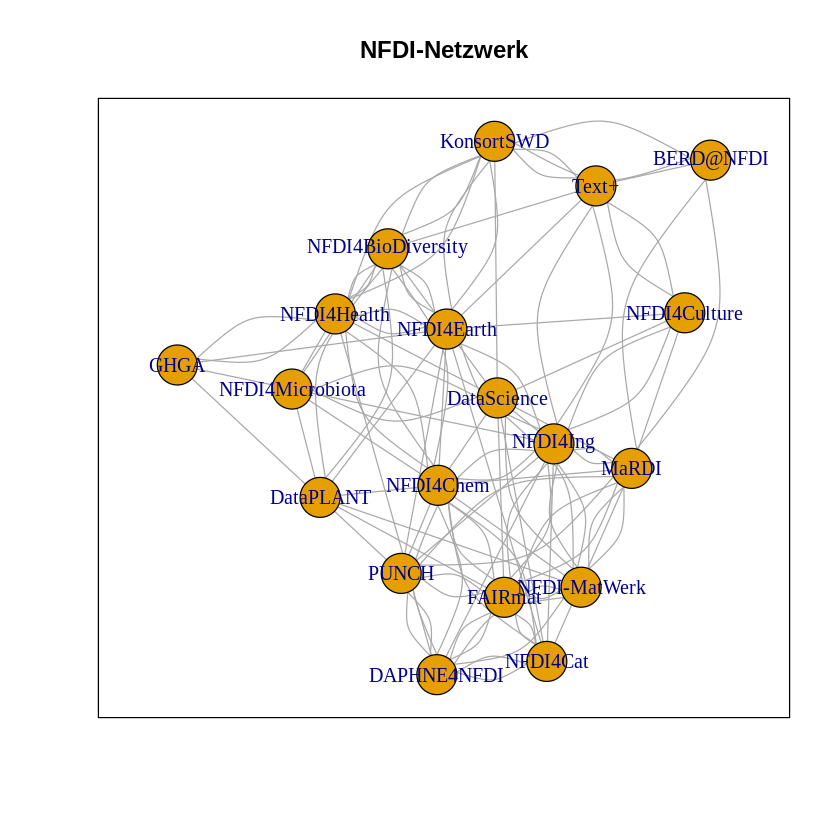

In [28]:
set.seed(987654)

plot(NFDI_network,                    # loading data frame
     main  = "NFDI-Netzwerk",         # adding a title
     frame = TRUE                     # making a frame 
     )


Wir sehen das Netzwerk der NFDI-Konsortien ohne weitere explizite Einstellungen.

## Layout-Einstellungen

Als nächsten Schritt möchten wir das Layout des Netzwerks optimieren.
Anstatt den Code für den Plot nochmals abzutippen, werden wir den Inhalt der letzten Zelle markieren, kopieren und in die nächste Zelle einfügen.

Wir erweitern auf diese Weise den Code und arbeiten Schritt für Schritt am Netzwerk.

Für das Layout von Netzwerken gibt es verschiedene Algorithmen.
Je nach Datensatz kann mal das eine Layout, mal das andere besser geeignet sein.
Mit dem Layout `graphopt`[^4] erzielt man in der Regel ein gutes Ergebnis.

Diesen Wert `layout.graphopt` übergeben wir dem Parameter `layout`.

[^4]: https://igraph.org/r/doc/layout_with_graphopt.html

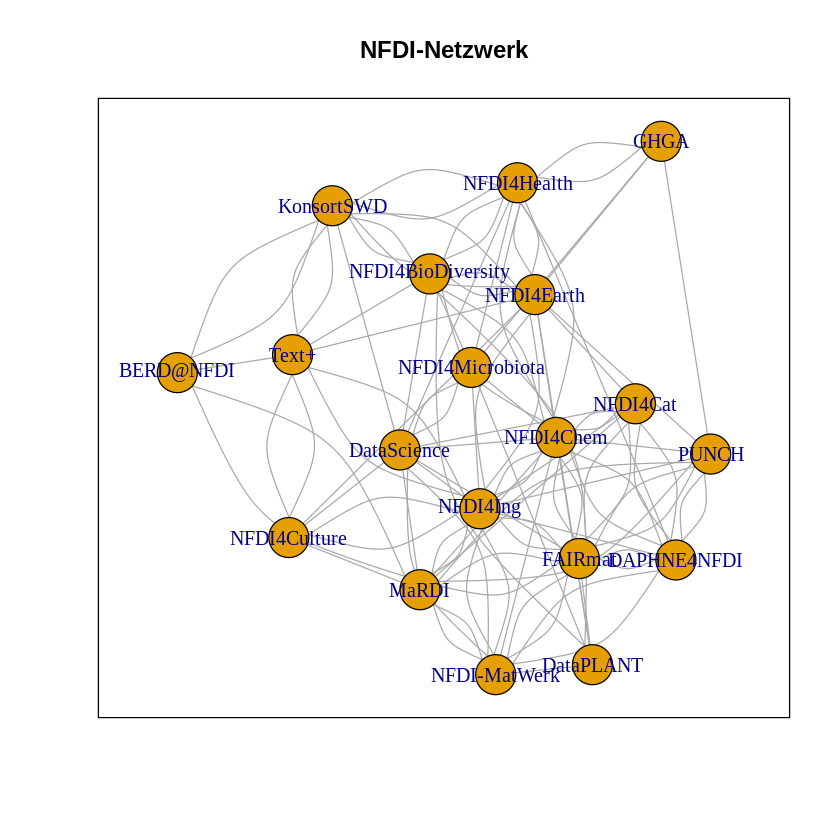

In [29]:
set.seed(98765)

plot(NFDI_network,                     # loading data frame
     main   = "NFDI-Netzwerk",         # adding a title
     frame  = TRUE,                    # making a frame
     layout = layout.graphopt,         #* better layout options
     )


Das Netzwerk ist jetzt schon besser strukturiert und die Abstände der Knoten sind harmonischer.

Wer möchte, der kann weitere Layout-Einstellungen[^4] ausprobieren:


* `layout_circle` (`circle,circular`): Deterministic layout that places the vertices on a circle
* `layout_drl` (`drl`): The Distributed Recursive Layout algorithm for large graphs
* `layout_fruchterman_reingold` (`fr`): Fruchterman-Reingold force-directed algorithm
* `layout_fruchterman_reingold_3d` (`fr3d, fr_3d`): Fruchterman-Reingold force-directed algorithm in three dimensions
* `layout_grid_fruchterman_reingold` (`grid_fr`): Fruchterman-Reingold force-directed algorithm with grid heuristics for large graphs
* `layout_kamada_kawai` (`kk`): Kamada-Kawai force-directed algorithm
* `layout_kamada_kawai_3d` (`kk3d, kk_3d`): Kamada-Kawai force-directed algorithm in three dimensions
* `layout_lgl` (`large, lgl, large_graph`): The Large Graph Layout algorithm for large graphs
* `layout_random` (`random`): Places the vertices completely randomly
* `layout_random_3d` (`random_3d`): Places the vertices completely randomly in 3D
* `layout_reingold_tilford` (`rt, tree`): Reingold-Tilford tree layout, useful for (almost) tree-like graphs
* `layout_reingold_tilford_circular` (`rt_circular, tree`): Reingold-Tilford tree layout with a polar coordinate post-transformation, useful for (almost) tree-like graphs
* `layout_sphere` (`sphere,spherical,circular_3d`): Deterministic layout that places the vertices evenly on the surface of a sphere





[^4]: https://igraph.org/python/doc/tutorial/tutorial.html#layout-algorithms

### Farbe, Größe, Krümmung (Knoten und Kanten)

Nachdem wir die Anordnung der Knoten optimiert haben, wollen wir im nächsten Schritt die Darstellung der Knoten und Kanten angehen.

Es lassen sich verschiedene Parameter nach eigenen Wünschen anpassen.

Zunächst möchten wir die Farbe der Knoten angehen.
Der Parameter lautet `vertex.color` und wir können einen HTML-Farbwert angeben (bspw. `#ffcc66`).[^5]
Für die Umrandung der Knoten wählen wir den gleichen Farbcode. Der Parameter lautet `vertex.frame.color`.

Die Beschriftung der Knoten lässt sich ebenfalls modifizieren. 
Die Änderung der Schriftgröße erfolgt über den Parameter `vertex.label.cex`, an den wir den Wert `0.5` übergeben.
Wichtig ist hier, dass der Wert *nicht* in Anführungszeichen geschrieben wird. 
Dies ist eine relative Größe und wir möchten die Label nur halb so groß wie im vorherigen Netzwerk dargestellt haben.
Auch die Farbe der Beschriftung ist änderbar.
Ganz analog heißt der Parameter `vertex.label.color`, an den wir den Farbwert auch als String, wie bspw. `"black"`, übergeben können.

Ein Netzwerk besteht neben den Knoten auch aus Kanten, die zwei Knoten verbinden.
Für die Farbänderung brauchen wir den Parameter `edge.color`, an den wir bspw. `"#808080"` übergeben.
Neben der Farbe können wir auch den Grad der "Krümmung" bestimmen, die mit `edge.curved` und dem Wert `0.1` eingestellt wird. Wichtig ist auch hier wieder, dass *keine* Anführungszeichen gesetzt werden.




[^5]: https://www.w3schools.com/colors/colors_picker.asp

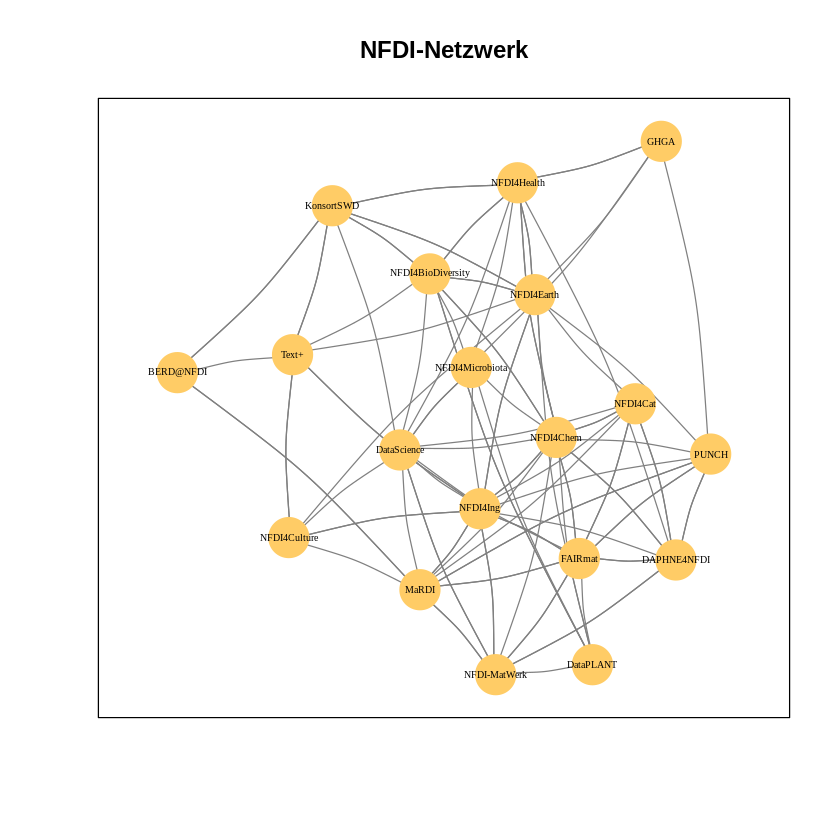

In [31]:
set.seed(98765)


plot(NFDI_network,                     # loading data frame
     main   = "NFDI-Netzwerk",         # adding a title
     frame  = TRUE,                    # making a frame 
     layout = layout.graphopt,         # better layout options
     vertex.color       = "#ffcc66",   #* color of nodes
     vertex.frame.color = "#ffcc66",   #* color of the frame of nodes
     vertex.label.cex   = 0.5,         #* size of the description of the labels
     vertex.label.color = "black",     #* color of the description 
     edge.color         = "#808080",   #* color of edges
     edge.curved        = 0.1,         #* factor of "curvity"
     )

## Knotengröße in Abhängigkeit der Kantenanzahl

In den bisherigen Netzwerkdarstellungen sind alle Knoten gleich groß.

Jetzt möchten wir eine weitere Informationsebene einbauen und die Knotengröße entsprechend der Anzahl ihrer Kanten ausgeben.

Die Anzahl der Kanten pro Knoten können wir mit der Funktion `degree`[^6] ermitteln.
Wenn wir dieser Funktion den Datensatz des Netzwerkes übergeben (`degree(NFDI_network)`),
dann erhalten wir die Anzahl der Kanten pro Knoten.
Diese Werte nehmen wir als Größeangabe für die Knoten.

Wir erweitern somit den bisherigen Code um eine Zeile.
Die Knotengröße verbirgt sich hinter dem Parameter `vertex.size` und als Wert übergeben wir die Funktion 
`degree(NFDI_network)`.



[^6]: https://igraph.org/r/doc/degree.html


In [37]:
degree(NFDI_network)                   #* calculate number of edges

DataPLANT              GHGA        KonsortSWD NFDI4BioDiversity 
                7                 5                11                13 
         NFDI4Cat         NFDI4Chem      NFDI4Culture       NFDI4Health 
               10                19                 7                13 
         NFDI4Ing         BERD@NFDI       DAPHNE4NFDI           FAIRmat 
               19                 5                12                16 
            MaRDI      NFDI-MatWerk       DataScience        NFDI4Earth 
               14                12                13                15 
  NFDI4Microbiota             PUNCH             Text+ 
                8                10                 9

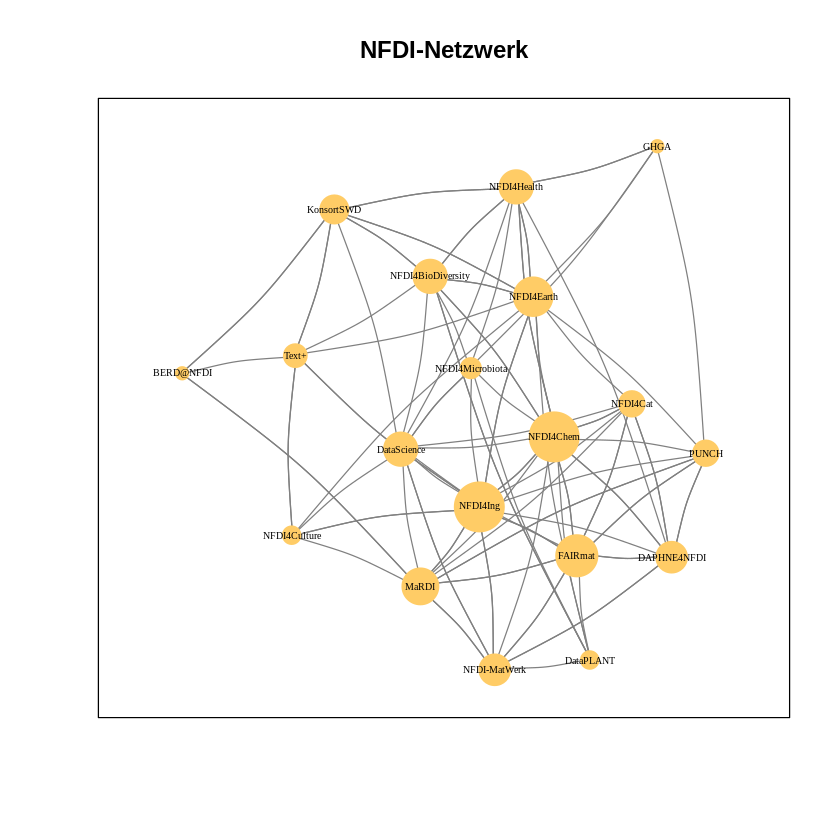

In [32]:
set.seed(98765)

plot(NFDI_network,                     # loading data frame
     main   = "NFDI-Netzwerk",         # adding a title
     frame  = TRUE,                    # making a frame 
     layout = layout.graphopt,         # better layout options
     vertex.color       = "#ffcc66",   # color of nodes
     vertex.frame.color = "#ffcc66",   # color of the frame of nodes
     vertex.label.cex   = 0.5,         # size of the description of the labels
     vertex.label.color = "black",     # color of the description 
                                       # color: https://www.w3schools.com/colors/colors_picker.asp 
     edge.color         = "#808080",   # color of edges
     edge.curved        = 0.1,         # factor of "curvity"
     vertex.size        = degree(NFDI_network), #* size of nodes depends on amount of edges
     )

## Knotengröße in Abhängigkeit der Anzahl ein- und ausgehender Kanten

Wir haben jetzt eine zweite Informationsebene in unser Netzwerk eingeführt und können die Knotengröße in Relation zur Kantenanzahl darstellen.

Im nächsten Schritt möchten wir eine weitere Komponente einführen. 
Bislang war es unerheblich, ob ein Konsortium im Datensatz an erster oder zweiter Stelle genannt wurde, das heißt, es war unerheblich, ob der aktive oder der passive Kooperationspartner ist.

Jetzt möchten wir die Unterscheidung im Netzwerk berücksichtigen. 
Dafür muss unser Graph (Netzwerk) "gerichtet" werden[^7].

Wir führen eine neue Variable (`NFDI_network_directed`) ein, die den Datensatz als gerichteten Graph enthält, 
was wir mit `directed = TRUE` einstellen.

[^7]: https://de.wikipedia.org/wiki/Gerichteter_Graph

In [40]:
NFDI_network_directed <- graph_from_data_frame(NFDI_edges,
                                          directed = TRUE
                                         )

Die restlichen Plotangaben übertragen wir aus der vorherigen Zelle.
Entscheidend ist nun, dass wir der Plot-Funktion die neue Variable mit dem gerichteten Graphen übergeben.
Zudem übergeben wir auch der Funktion `degree` die neue Variable.

Im gerichteten Netzwerk erschwert die Krümmung der Kanten die Lesbarkeit.
Daher wählen wir für `edge.curved` den Wert `0`.

Ebenso sollen die Pfeilspitzen kleiner werden, was mit `edge.arrow.size` und dem relativen Wert `0.5` möglich ist.

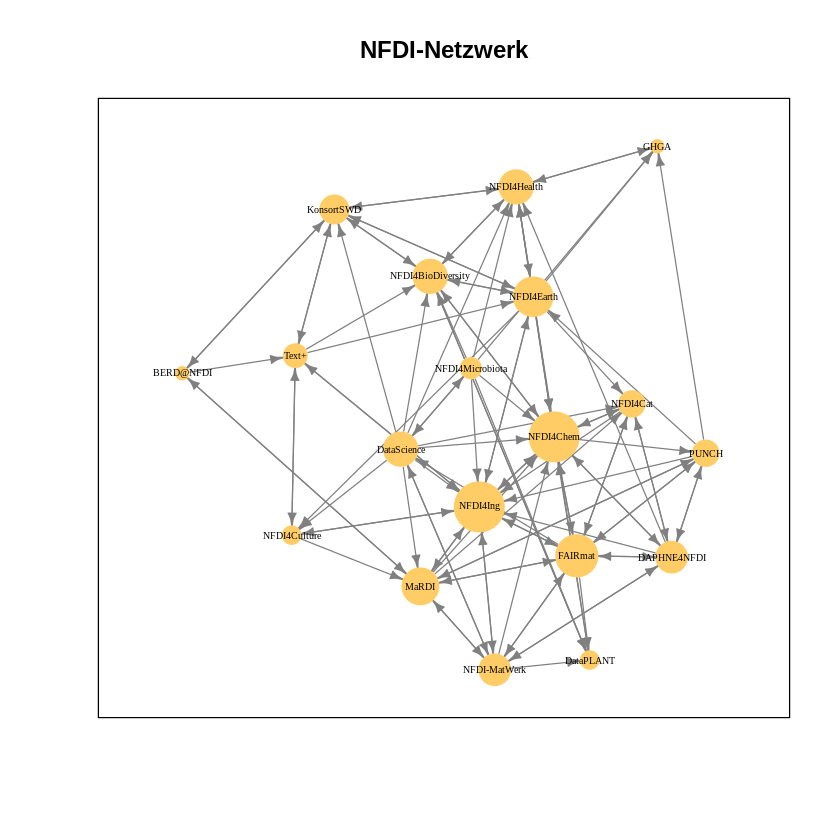

In [41]:
set.seed(98765)

plot(NFDI_network_directed,            #<<<<<<< loading data frame
     main   = "NFDI-Netzwerk",         # adding a title
     frame  = TRUE,                    # making a frame 
     layout = layout.graphopt,         # better layout options
     vertex.color       = "#ffcc66",   # color of nodes
     vertex.frame.color = "#ffcc66",   # color of the frame of nodes
     vertex.label.cex   = 0.5,         # size of the description of the labels
     vertex.label.color = "black",     # color of the description 
                                       # color: https://www.w3schools.com/colors/colors_picker.asp 
     edge.color         = "#808080",   # color of edges
     edge.curved        = 0,           #<<<<<<<<< factor of "curvity"
     vertex.size        = degree(NFDI_network_directed), #<<<<<< size of nodes depends on amount of edges
     edge.arrow.size    = .5,          #* arrow size,  defaults to 1
    )


Im nächsten Schritt möchten wir die Knotengröße entsprechend der *ein*gehenden Kanten skalieren.
Je öfter ein Konsortium als Kooperationspartner genannt wird, desto größer wird dessen Knoten.

Wir können dafür die Funktion `degree` modifizieren, indem wir `mode = "in"` ergänzen[^8].

```{R}
degree(NFDI_network_directed,
       mode = "in")
```


[^8]: https://igraph.org/r/doc/degree.html


In [42]:
degree(NFDI_network_directed,
       mode = "in")

DataPLANT              GHGA        KonsortSWD NFDI4BioDiversity 
                5                 4                 6                 8 
         NFDI4Cat         NFDI4Chem      NFDI4Culture       NFDI4Health 
                6                12                 4                 8 
         NFDI4Ing         BERD@NFDI       DAPHNE4NFDI           FAIRmat 
               12                 2                 5                 7 
            MaRDI      NFDI-MatWerk       DataScience        NFDI4Earth 
                7                 5                 3                 6 
  NFDI4Microbiota             PUNCH             Text+ 
                1                 4                 4

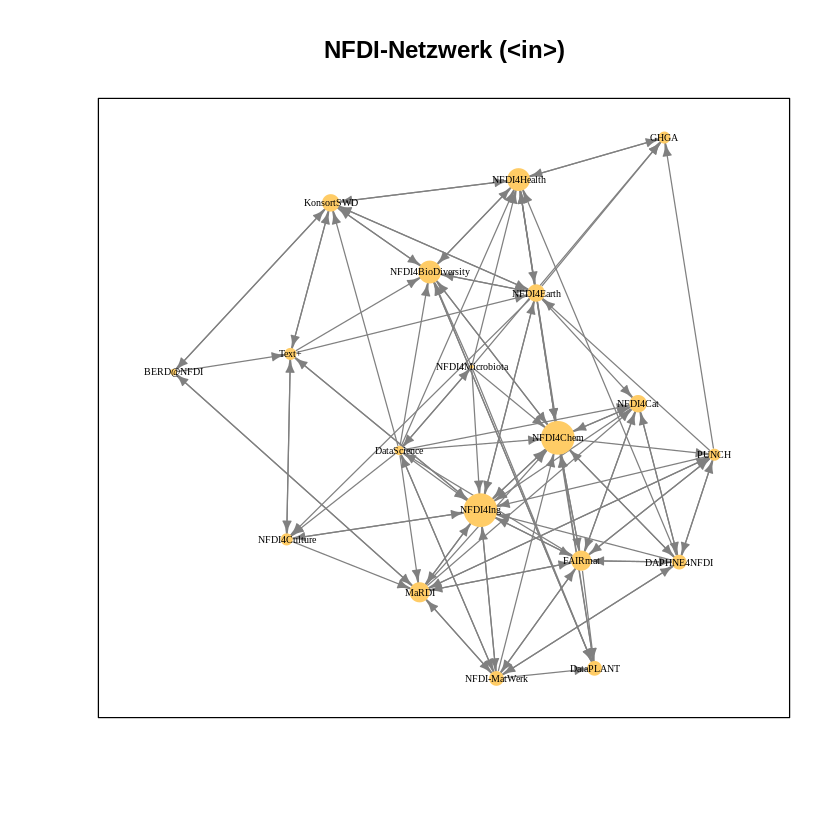

In [44]:
set.seed(98765)

plot(NFDI_network_directed,            # loading data frame
     main   = "NFDI-Netzwerk (<in>)",  #<<<<<<<< adding a title
     frame  = TRUE,                    # making a frame 
     layout = layout.graphopt,         # better layout options
     vertex.color       = "#ffcc66",   # color of nodes
     vertex.frame.color = "#ffcc66",   # color of the frame of nodes
     vertex.label.cex   = 0.5,         # size of the description of the labels
     vertex.label.color = "black",     # color of the description 
                                       # color: https://www.w3schools.com/colors/colors_picker.asp 
     edge.color         = "#808080",   # color of edges
     edge.curved        = 0,           # factor of "curvity"
     vertex.size        = degree(NFDI_network_directed,
                                 mode = "in"), #<<<<<< size of nodes depends on amount of edges
     edge.arrow.size    = .5,          # arrow size,  defaults to 1
    )

Ebenfalls können wir nun auch die Größe der Konsortien entsprechend ihrer *aus*gehenden Kanten darstellen.

Wir übernehmen den kompletten Zelleninhalt von zuvor und ändern lediglich `in` zu `out`.



In [45]:
degree(NFDI_network_directed,
       mode = "out")

DataPLANT              GHGA        KonsortSWD NFDI4BioDiversity 
                2                 1                 5                 5 
         NFDI4Cat         NFDI4Chem      NFDI4Culture       NFDI4Health 
                4                 7                 3                 5 
         NFDI4Ing         BERD@NFDI       DAPHNE4NFDI           FAIRmat 
                7                 3                 7                 9 
            MaRDI      NFDI-MatWerk       DataScience        NFDI4Earth 
                7                 7                10                 9 
  NFDI4Microbiota             PUNCH             Text+ 
                7                 6                 5

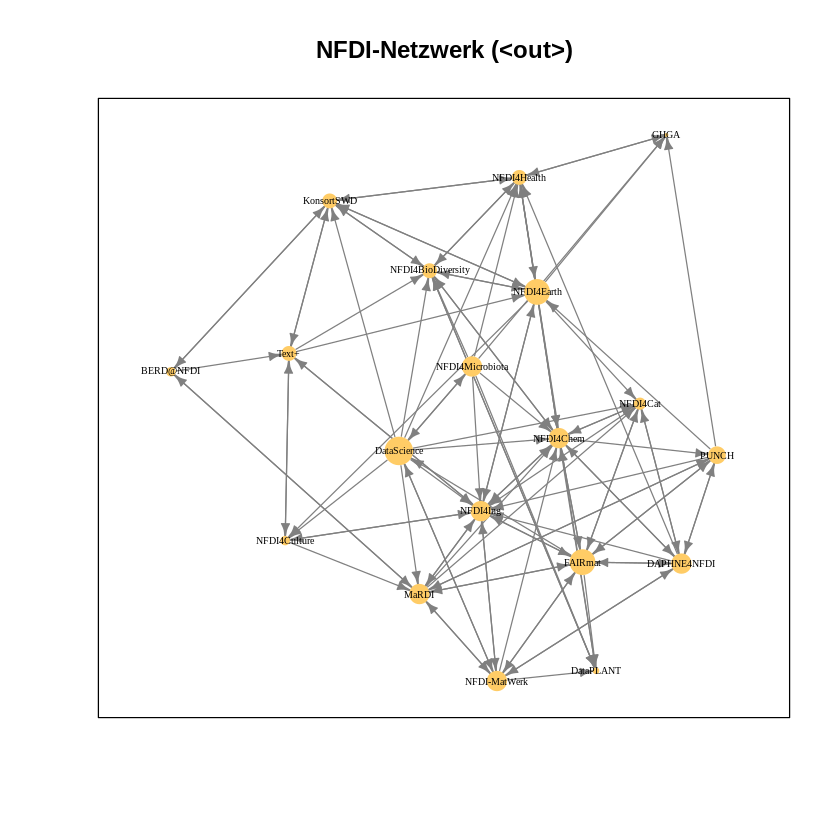

In [47]:
set.seed(98765)

plot(NFDI_network_directed,            # loading data frame
     main   = "NFDI-Netzwerk (<out>)",  #<<<<<<<< adding a title
     frame  = TRUE,                    # making a frame 
     layout = layout.graphopt,         # better layout options
     vertex.color       = "#ffcc66",   # color of nodes
     vertex.frame.color = "#ffcc66",   # color of the frame of nodes
     vertex.label.cex   = 0.5,         # size of the description of the labels
     vertex.label.color = "black",     # color of the description 
                                       # color: https://www.w3schools.com/colors/colors_picker.asp 
     edge.color         = "#808080",   # color of edges
     edge.curved        = 0,           # factor of "curvity"
     vertex.size        = degree(NFDI_network_directed,
                                 mode = "out"), #<<<<<< size of nodes depends on amount of edges
     edge.arrow.size    = .5,          # arrow size,  defaults to 1
    )

Es fällt auf, dass einige Knoten schrumpfen und in der Tabelle sieht man, dass sie den Wert `0` bei ausgehenden Kanten haben. Das liegt daran, dass dies die Konsortien sind, die in der ersten Förderrunde bereits bewilligt wurden und daher keinen neuen Letters of Intent eingereicht haben. Unser Datensatz berücksichtigt ja nur die Letters of Intent der zweiten Förderrunde. 
Die Konsortien der ersten Runde können daher nur als "passive" Kooperationspartner genannt werden.

## Ausschluss der Konsortien aus der ersten Förderrunde

Wir können nun mal schauen, wie sich das Netzwerk ändert, wenn wir die bereits geförderten Konsortien ausschließen.
Damit bekommen wir ein Netzwerk, das nur die Kooperationen der Konsortien der zweiten Förderrunde berücksichtigt.

Der Filter bzw. das Löschen der besagten Konsortien funktioniert so:
Die Funktion `delete_vertices` kümmert sich um die Löschung wir müssen dafür zunächst den Netzwerkgraphen angeben,
anschließend findet eine Berechnung statt:
Es sollen alle Knoten/Konsortien (ausgegeben durch die Funktion `V`) gelöscht werden, deren Anzahl an Kanten im Modus `out` gleich `0` ist.
Diese gelöschte Knoten übergeben wir der neuen Variable `NFDI_network_directed_filter`,
die wir weiter nutzen können.

Als Darstellungsmodus des Netzwerks wählen wir `total`, da es jetzt nicht um die separate Anzahl der ein- und ausgehenden Verbindungen, sondern um deren Summe geht.



In [48]:
NFDI_network_directed_filter <- delete_vertices(NFDI_network_directed, 
            V(NFDI_network_directed)[ degree(NFDI_network_directed, mode = "out") == 0 ])

degree(NFDI_network_directed_filter,
       mode = "total")

DataPLANT              GHGA        KonsortSWD NFDI4BioDiversity 
                7                 5                11                13 
         NFDI4Cat         NFDI4Chem      NFDI4Culture       NFDI4Health 
               10                19                 7                13 
         NFDI4Ing         BERD@NFDI       DAPHNE4NFDI           FAIRmat 
               19                 5                12                16 
            MaRDI      NFDI-MatWerk       DataScience        NFDI4Earth 
               14                12                13                15 
  NFDI4Microbiota             PUNCH             Text+ 
                8                10                 9

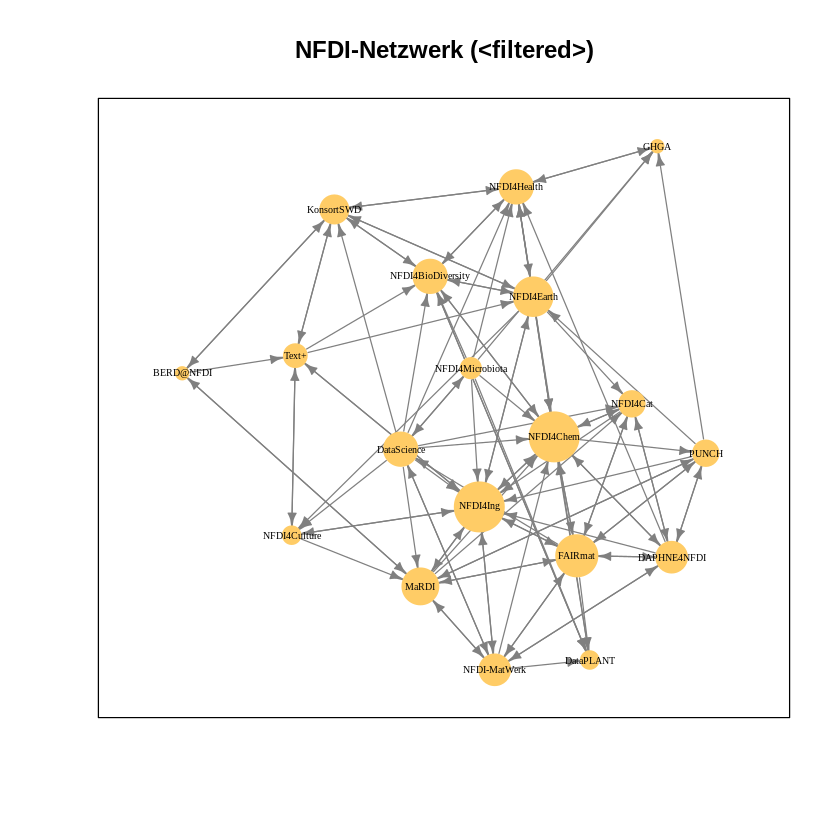

In [49]:
set.seed(98765)

plot(NFDI_network_directed_filter,           #<<<<<<<< loading data frame
     main   = "NFDI-Netzwerk (<filtered>)",  #<<<<<<<< adding a title
     frame  = TRUE,                    # making a frame 
     layout = layout.graphopt,         # better layout options
     vertex.color       = "#ffcc66",   # color of nodes
     vertex.frame.color = "#ffcc66",   # color of the frame of nodes
     vertex.label.cex   = 0.5,         # size of the description of the labels
     vertex.label.color = "black",     # color of the description 
                                       # color: https://www.w3schools.com/colors/colors_picker.asp 
     edge.color         = "#808080",   # color of edges
     edge.curved        = 0,           # factor of "curvity"
     vertex.size        = degree(NFDI_network_directed_filter,
                                 mode = "total"), #<<<<<< size of nodes depends on amount of edges
     edge.arrow.size    = .5,          # arrow size,  defaults to 1
    )

# Netzwerkanalyse

Nach den bisherigen Runden der Netzwerkvisualisierung wollen wir noch einen Schritt weiter gehen und die Netzwerkstruktur analysieren.

## NFDI-Konferenzsystematik

Als ersten Schritt wollen wir die Knoten bzw. Konsortien in den Farben der NFDI-Konferenzsystematik einfärben.

Wie kommt die NFDI-Konferenzsystematik zustande?
Für die Vorträge wurden fünf Panels aufgemacht:

1. Medizin
2. Lebenswissenschaften
3. Geisteswissenschaften
4. Ingenieurwissenschaften
5. Chemie/Physik

Die antragsstellenden Konsortien wurden auf diese fünf Gruppen eingeteilt:[^7b]

![Konferenzsystematik](img/nfdi-konferenzsystematik.png)

Im Folgenden kürzen wir die Gruppe 4 "Informatik, Mathematik und Ingenieurwissenschaften" mit "Ingenieurwissenschaften" ab.

[^7b]: https://www.dfg.de/download/pdf/foerderung/programme/nfdi/nfdi_konferenz_2020/programm_webkonferenz_2020.pdf


Auffällig ist, dass nach der DFG-Fachsystematik die Naturwissenschaften auf die Lebenswissenschaften, Ingenieurwissenschaften und Chemie/Physik aufgeteilt worden sind, wie man im folgenden Sankey (Flussdiagramm) sehen kann.

![Sankey](img/dfg-nfdi-sankey.png)

Alle Konsortien sind also einem dieser fünf Bereiche zugeteilt und wir wollen das nun im Netzwerk zeigen.
Diese Einteilung der Konsortien auf die Konferenzsystematik laden wir in der nächsten Zelle.

Dieser neue Datensatz wird der Variable `NFDI_nodes` übergeben; die erste Spalte beinhaltet die Konsortialnamen, die zweite Spalte die Nummer aus der NFDI-*Konferenz*systematik.
In der dritten Spalte steht die Runde, in der das Konsortium bewillgt wurde: `1`= 2019, `2`= 2020.
Die Daten können aus dem öffentlichen GitHub-Gist [nfdi-consortia.csv](https://gist.github.com/LukasCBossert/ce56ebd0059b4879c7d11c1090118c25) eingelesen werden.

In [50]:
NFDI_nodes <- read.table(header=TRUE,
                         sep=",",
                         text="
name,group,round
DataPLANT,2,1
GHGA,1,1
KonsortSWD,3,1
NFDI4BioDiversity,2,1
NFDI4Cat,5,1
NFDI4Chem,5,1
NFDI4Culture,3,1
NFDI4Health,1,1
NFDI4Ing,4,1
BERD@NFDI,3,2
DAPHNE4NFDI,5,2
FAIRmat,5,2
MaRDI,4,2
NFDI-MatWerk,4,2
DataScience,4,2
NFDI4Earth,2,2
NFDI4Microbiota,2,2
PUNCH,5,2
Text+,3,2
")

Jetzt müssen wir aus dem Datensatz noch ein Graph-Datensatz erstellen, was wiederum mit `graph_from_data_frame` geschieht. Neu ist, dass wir nun differenzieren, was unser Kanten-Data-Frame und was die Liste mit den Knoten ist.



In [51]:
NFDI_network_directed <- graph_from_data_frame(d = NFDI_edges,        # d = data frame =~ edges
                                               vertices = NFDI_nodes, #nodes
                                               directed = TRUE)       #directed

## DFG/NFDI-Farbkodierung

Damit wir die Knoteneinteilung auf die NFDI-Konferenzsystematik im Netzwerk besser erkennen, wählen wir eine Farbcodierung entsprechend der DFG-Fachsystematik (ggf. leichte Anpassung).

Es gelten folgende Werte

| Nr. | Bezeichnung             | HTML-Farbcode |
|:---:|-------------------------|:-------------:|
| (1) | Medizin                 |   `#f5ac9f`   |
| (2) | Lebenswissenschaften    |   `#e43516`   |
| (3) | Geisteswissenschaften   |   `#f9b900`   |
| (4) | Ingenieurwissenschaften |   `#007aaf`   |
| (5) | Chemie/Physik           |   `#6ca11d`   |


Diese Farbwerte geben wir jetzt der Reihe nach an die Variable `NFDI_color_code` weiter,
dabei werden die Farbwerte in eine Liste geschrieben. 
Anhand der Funktion `c` werden die Werte in einen Vektor geschrieben,[^11]
mit dem wir weiterarbeiten können.


Jetzt müssen wir noch die Verknüpfung zwischen Farbwert und den Konsortien herstellen.
Dafür führen wir die Variable `NFDI_color_groups` ein:
Jeder Wert aus `NFDI_color_code` hat eine Positionsnummer (1-5),
das nutzen wir, indem wir den Wert der zweiten Spalte des Netzwerkgraphen (`$group`) als Zahl auswerten und so den Farbwert übergeben.
Vereinfacht gesagt und vom Ergebnis her gesehen, bekommt die Nummer der NFDI-Konferenzsystematik den Farbwert, der an der entsprechenden Stelle in der Liste der Variable `NFDI_color_code` steht.


[^11]: https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/c

In [52]:
NFDI_color_code <- c("#f5ac9f", # Medizin
                     "#e43516", # Lebenswissenschaften
                     "#f9b900", # Geisteswissenschaften
                     "#007aaf", # Ingenieurwissenschaften
                     "#6ca11d"  # Chemie/Physik
                    )
NFDI_color_groups <- NFDI_color_code[as.numeric(as.factor(V(NFDI_network_directed)$group))]

## Netzwerk mit eingefärbten Knoten

Wir können wiederum den Code der vorhergehenden Zelle übernehmen und anpassen.

Entscheidend ist, dass wir bei `vertex.color` und `vertex.frame.color` die Variable `NFDI_color_groups` als Wert angeben.
Wir wollen ebenfalls das gesamte Netzwerk mit allen Kanten (`mode = "total"`) berücksichtigen und darstellen.

Was jetzt noch fehlt, ist eine Legende, sodass wir auch sehen, was hinter der Farbcodierung steckt.

Dafür gibt es eine spezielle Funktion `legend`, die wir nun mit Werten füllen:

* Zunächst die Positionierung der Legende, die wir "unten rechts" (`"bottomright"`) haben wollen,
dann der Titel (`title = "NFDI-Konferenzsystematik"`),
jetzt kommt der Inhalt der Legende, was über den Parameter `legend` geregelt wird:
Hierfür bauen wir uns wiederum eine Liste (`c()`), in der wir die gewünschten Werte eintragen.
* `col`: Mit `col` wird das Farbschema festgesetzt und wir können direkt auf die NFDI-Farbliste über die Variable `NFDI_color_code` verweisen. 
* `pch`: Wir dürfen auf keinen Fall den Parameter `pch` vergessen, da hierüber das Symbol in der Legende definiert wird. Mit dem Wert `20` wählen wir einen ausgefüllten Kreis.
* `bty`: Mit `bty` und dem Wert `n` für `no` verzichten wir auf einen Rahmen um die Legende.
* `cex` (also `character expansion`)  ist wieder ein relativer Wert und wir können die Schriftgröße bestimmen;
ähnlich dazu funktioniert `pt.cex` für die Symbole der Legende.

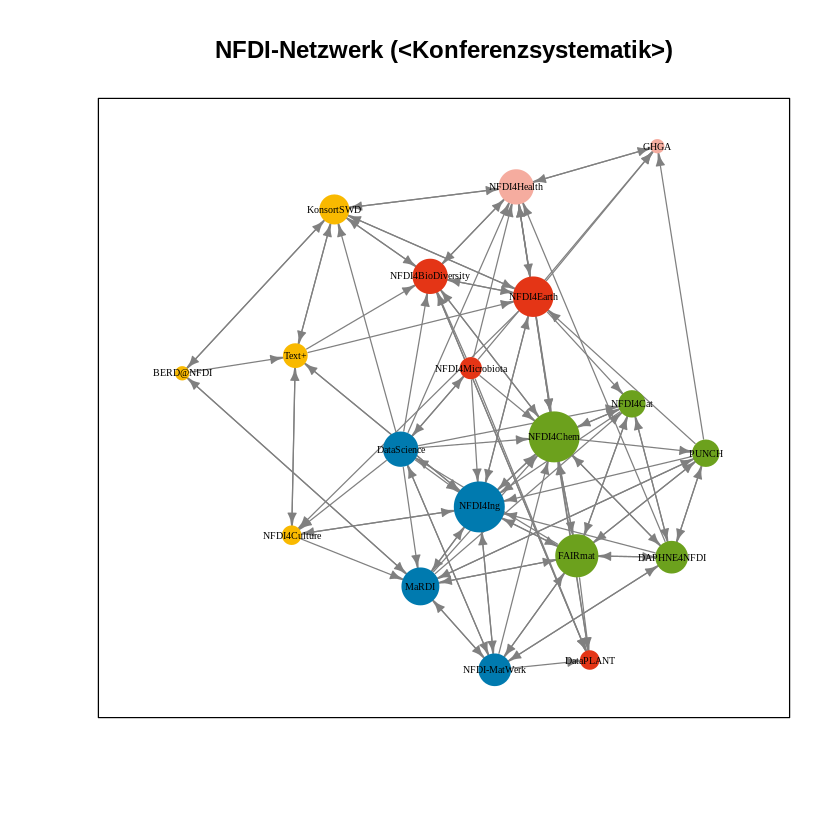

In [64]:
set.seed(98765)

plot(NFDI_network_directed,            # loading data frame
     main   = "NFDI-Netzwerk (<Konferenzsystematik>)",  #<<<<<<<< adding a title
     frame  = TRUE,                    # making a frame 
     layout = layout.graphopt,         # better layout options
     vertex.color       = NFDI_color_groups,   #<<<<<<<<<<  color of nodes
     vertex.frame.color = NFDI_color_groups,   #<<<<<<<<<< color of the frame of nodes
     vertex.label.cex   = 0.5,         # size of the description of the labels
     vertex.label.color = "black",     # color of the description 
                                       # color: https://www.w3schools.com/colors/colors_picker.asp 
     edge.color         = "#808080",   # color of edges
     edge.curved        = 0,           # factor of "curvity"
     vertex.size        = degree(NFDI_network_directed,
                                 mode = "total"), #<<<<<<<<<<< size of nodes depends on amount of edges
     edge.arrow.size    = .5,          # arrow size,  defaults to 1
    )

Ok, we want to add a legend now and since we want to define it only once we make it as a function.

In [71]:
nfdi_plot_legend <- function(){
    
    legend("bottomleft",   # x-position
       title  = "NFDI-Konferenzsystematik", # title
       legend = c(
           "(1) Medizin",
           "(2) Lebenswissenschaften",
           "(3) Geisteswissenschaften",
           "(4) Ingenieurwissenschaften",
           "(5) Chemie/Physik"
       ),  # the text of the legend
       col    = NFDI_color_code ,  # colors of lines and points beside the legend text
       pch    = 20,     # the plotting symbols appearing in the legend
       bty    = "n",    # no frame, the type of box to be drawn around the legend (n=no frame)
       cex    = .75,    # character expansion factor relative to current par("cex").
       pt.cex = 2       # expansion factor(s) for the points
)
}

Now we add the legend to the plot.

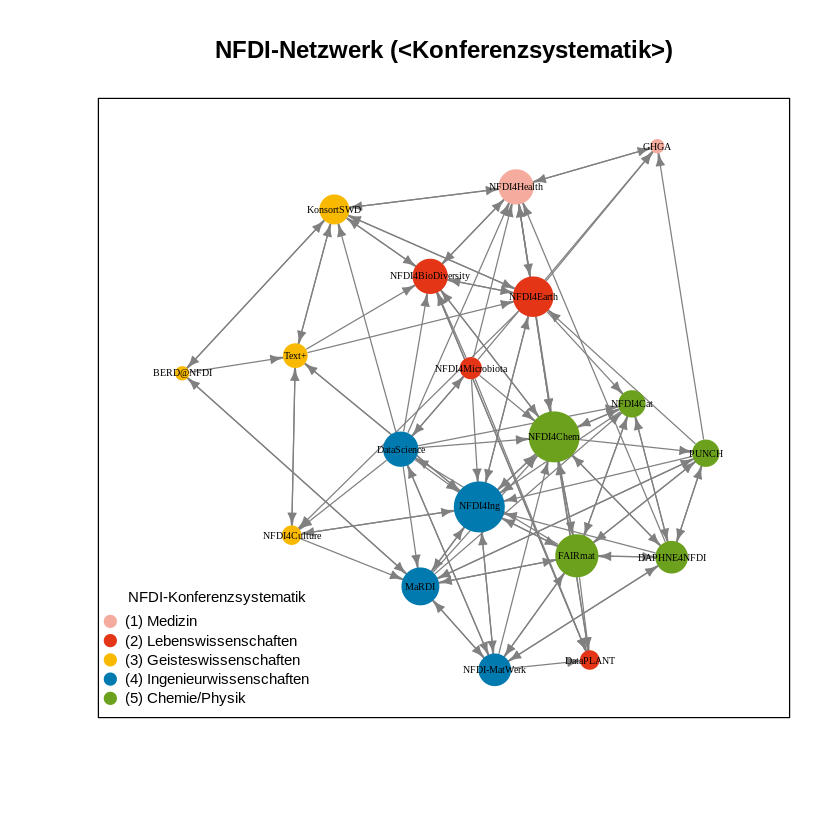

In [72]:
set.seed(98765)

plot(NFDI_network_directed,            # loading data frame
     main   = "NFDI-Netzwerk (<Konferenzsystematik>)",  #<<<<<<<< adding a title
     frame  = TRUE,                    # making a frame 
     layout = layout.graphopt,         # better layout options
     vertex.color       = NFDI_color_groups,   #<<<<<<<<<<  color of nodes
     vertex.frame.color = NFDI_color_groups,   #<<<<<<<<<< color of the frame of nodes
     vertex.label.cex   = 0.5,         # size of the description of the labels
     vertex.label.color = "black",     # color of the description 
                                       # color: https://www.w3schools.com/colors/colors_picker.asp 
     edge.color         = "#808080",   # color of edges
     edge.curved        = 0,           # factor of "curvity"
     vertex.size        = degree(NFDI_network_directed,
                                 mode = "total"), #<<<<<<<<<<< size of nodes depends on amount of edges
     edge.arrow.size    = .5,          # arrow size,  defaults to 1
    )
nfdi_plot_legend()

## Additional stuff

Let us concentrate on only one consortium and display the connection from or to this consortium.

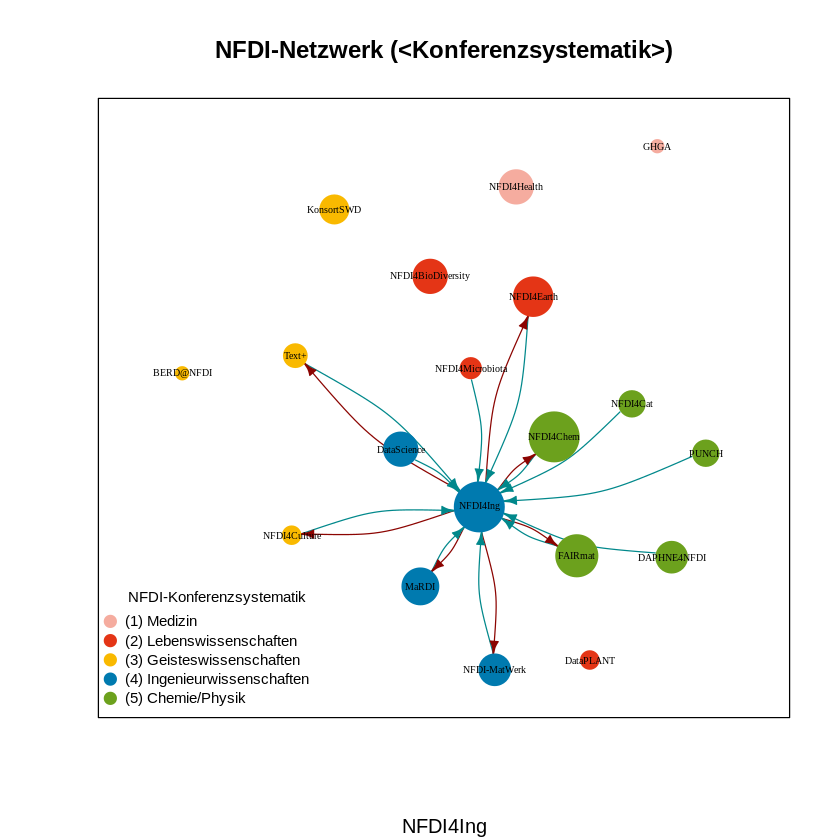

In [80]:
nfdi_plot_group <- function(NFDI_name) {
  
    set.seed(98765)
    nfdi_local_network <- function(NFDI_name) {
    plot(NFDI_network_directed,
     main   = "NFDI-Netzwerk (<Konferenzsystematik>)",  #<<<<<<<< adding a title
    sub = NFDI_name,
     frame  = TRUE,                    # making a frame 
     layout = layout.graphopt,         # better layout options
     vertex.color       = NFDI_color_groups,   #<<<<<<<<<<  color of nodes
     vertex.frame.color = NFDI_color_groups,   #<<<<<<<<<< color of the frame of nodes
     vertex.label.cex   = 0.5,         # size of the description of the labels
     vertex.label.color = "black",     # color of the description 
                                       # color: https://www.w3schools.com/colors/colors_picker.asp 
     edge.curved        = 0.2,           # factor of "curvity"
     vertex.size        = degree(NFDI_network_directed,
                                 mode = "total"), #<<<<<<<<<<< size of nodes depends on amount of edges
     edge.arrow.size    = .5,          # arrow size,  defaults to 1
         edge.color = with(NFDI_edges,
                           ifelse(from %in% NFDI_name,"#8b0401",
                                  ifelse(to == NFDI_name,"#01888B",
                                         NA)))
        )
    nfdi_plot_legend()

      
          }
    

# pdf(paste0("img/network_group_",NFDI_name,".pdf"))   
# nfdi_local_network(NFDI_name)
# dev.off()
 nfdi_local_network(NFDI_name)
}
nfdi_plot_group("NFDI4Ing")

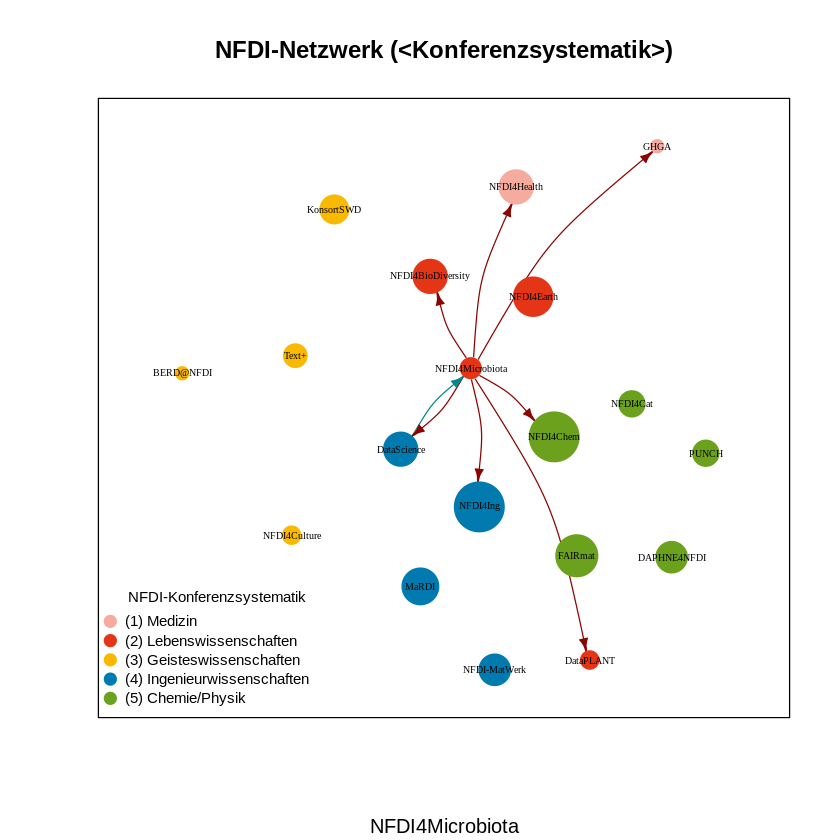

In [81]:
nfdi_plot_group("NFDI4Microbiota")

I love loops....

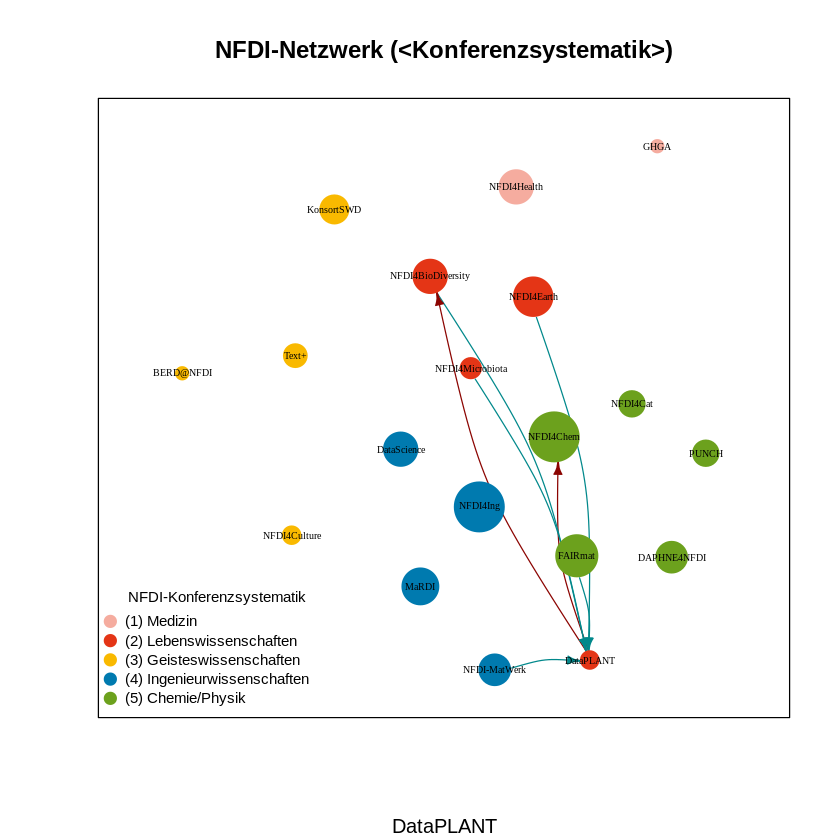

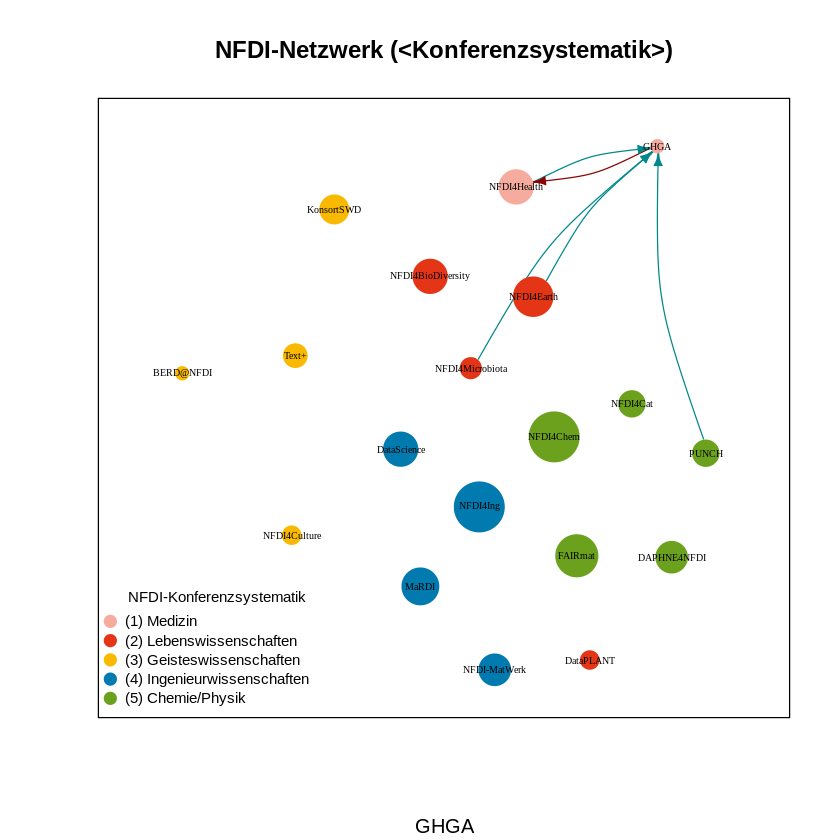

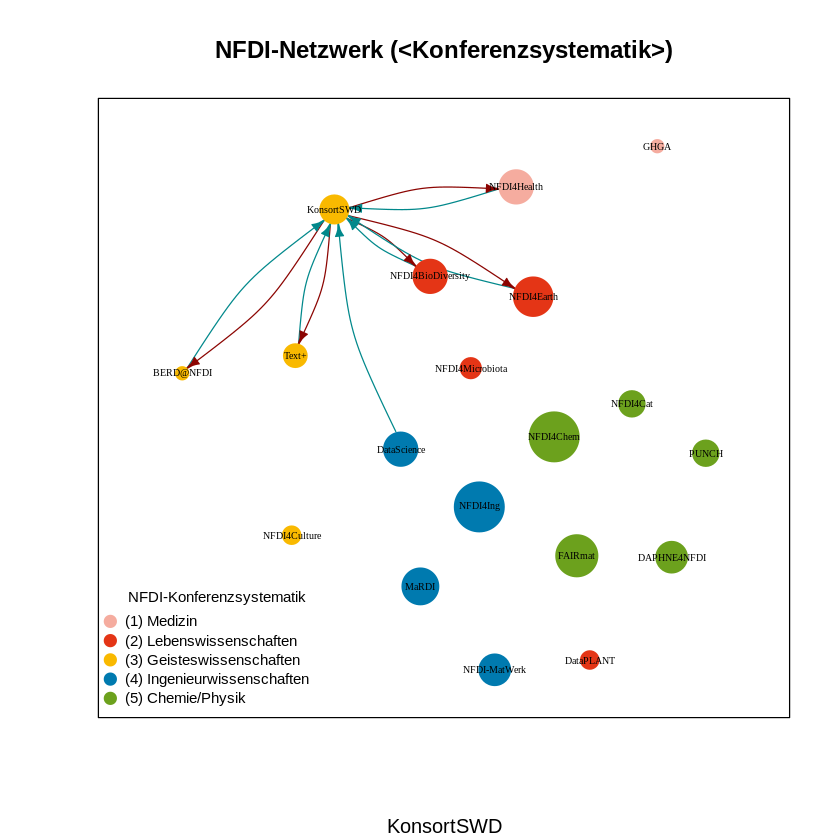

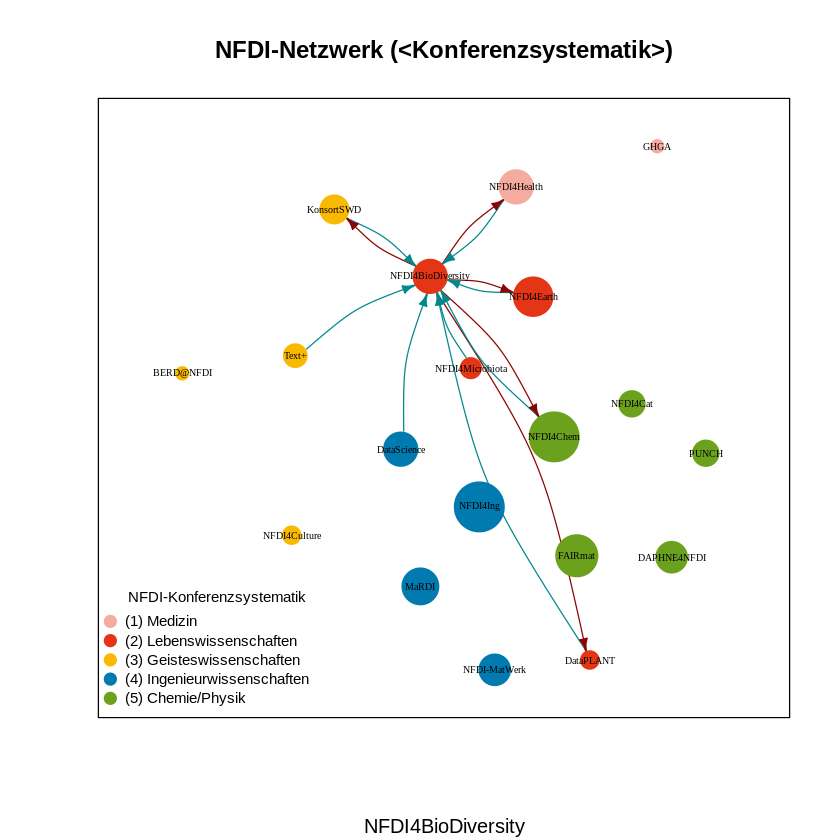

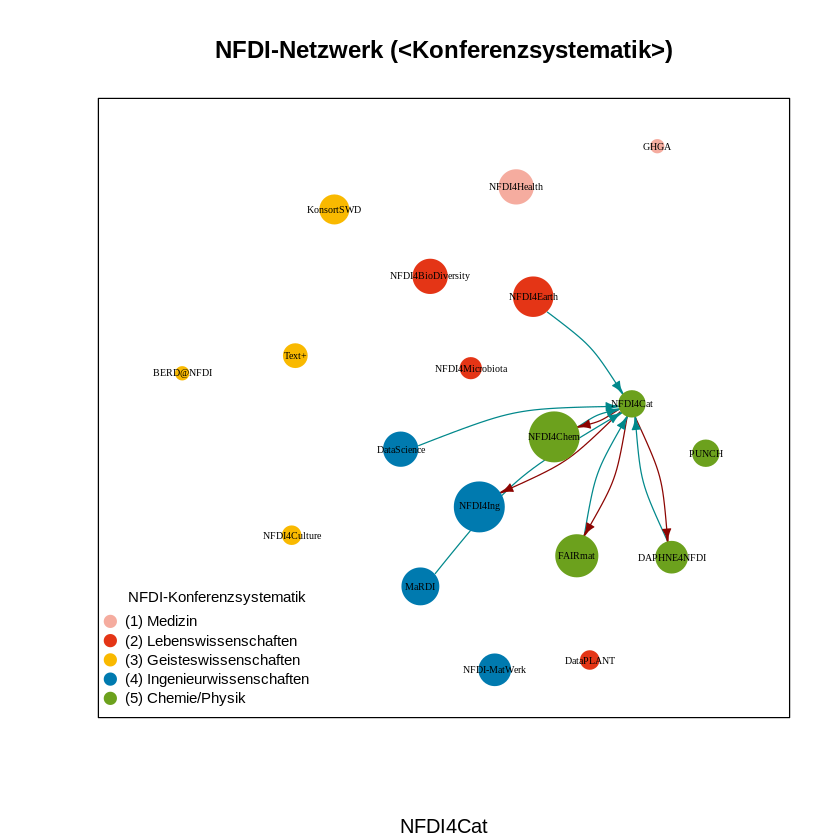

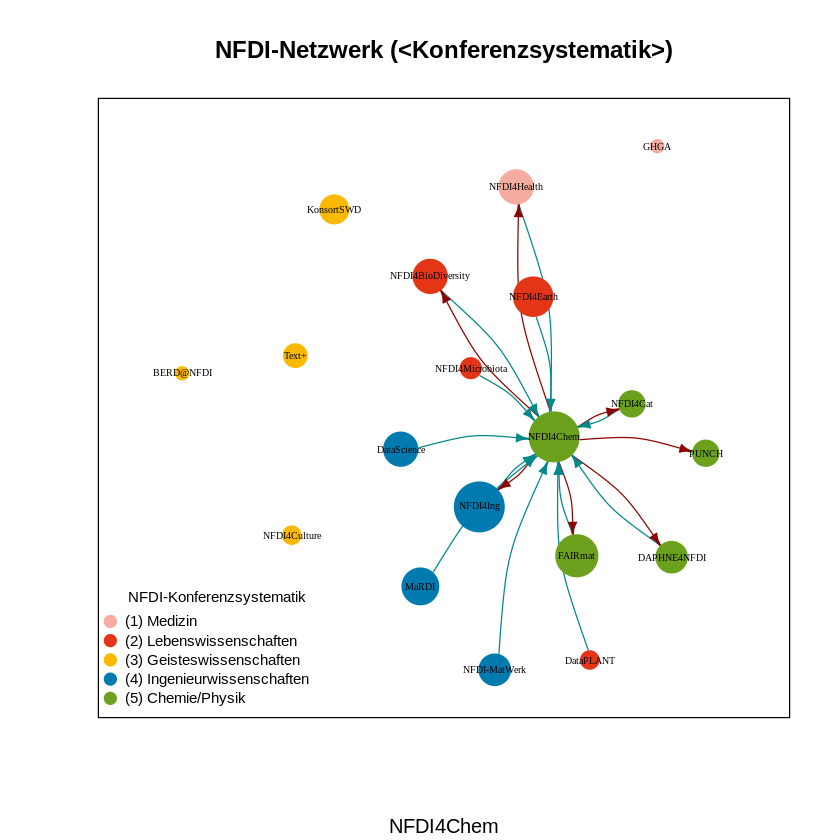

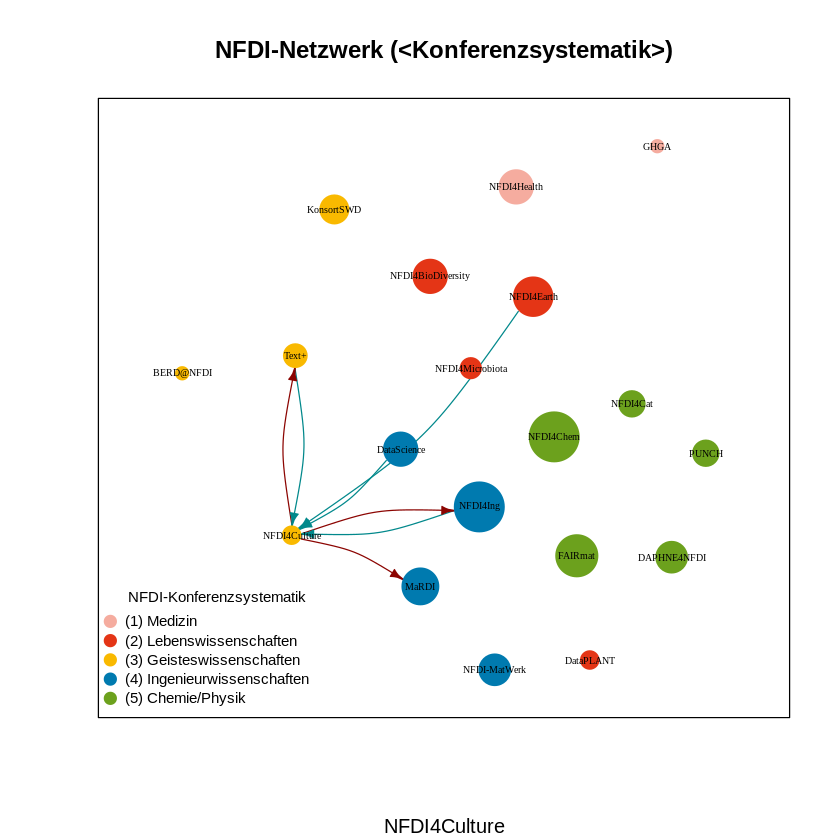

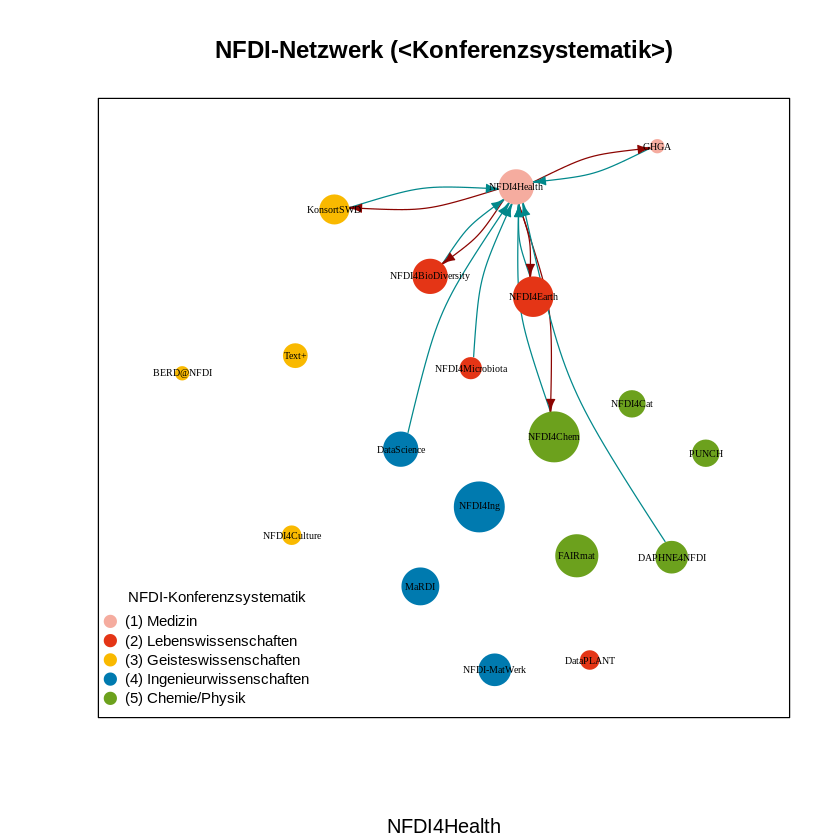

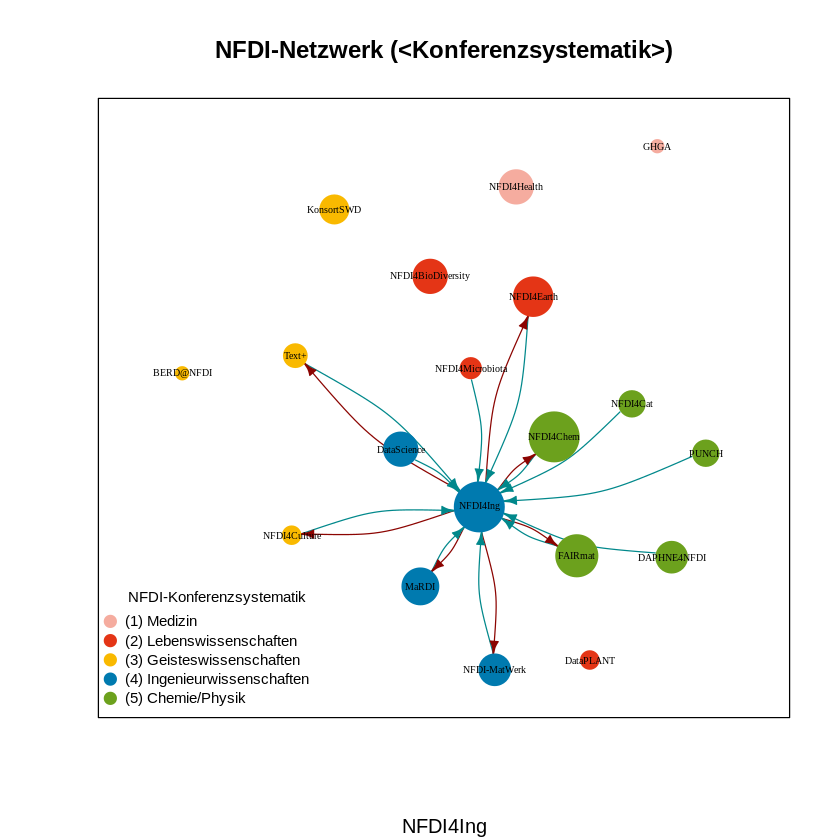

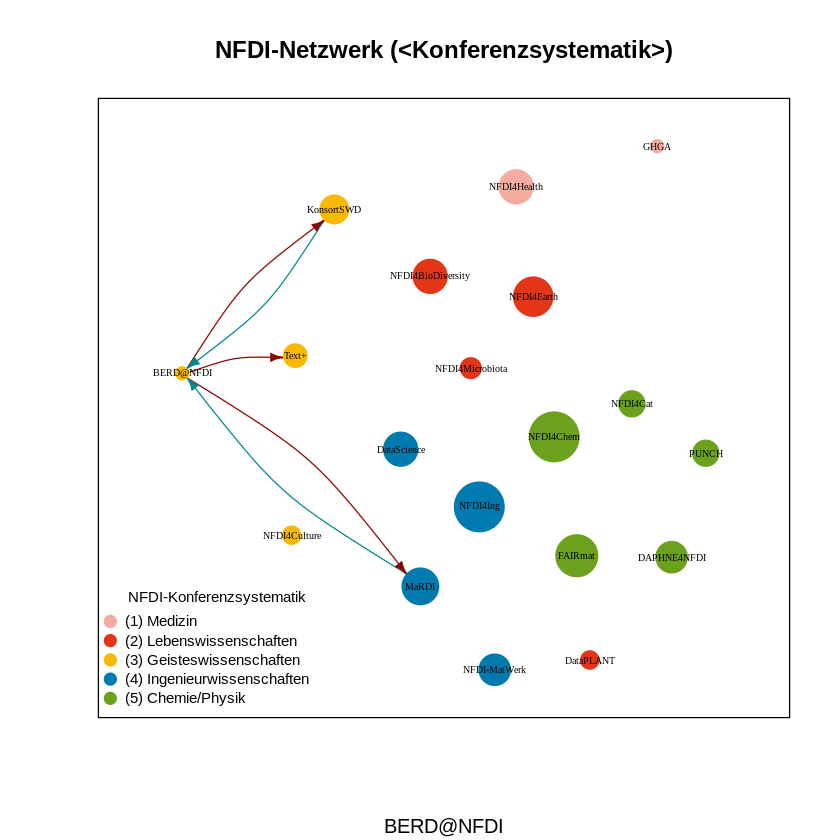

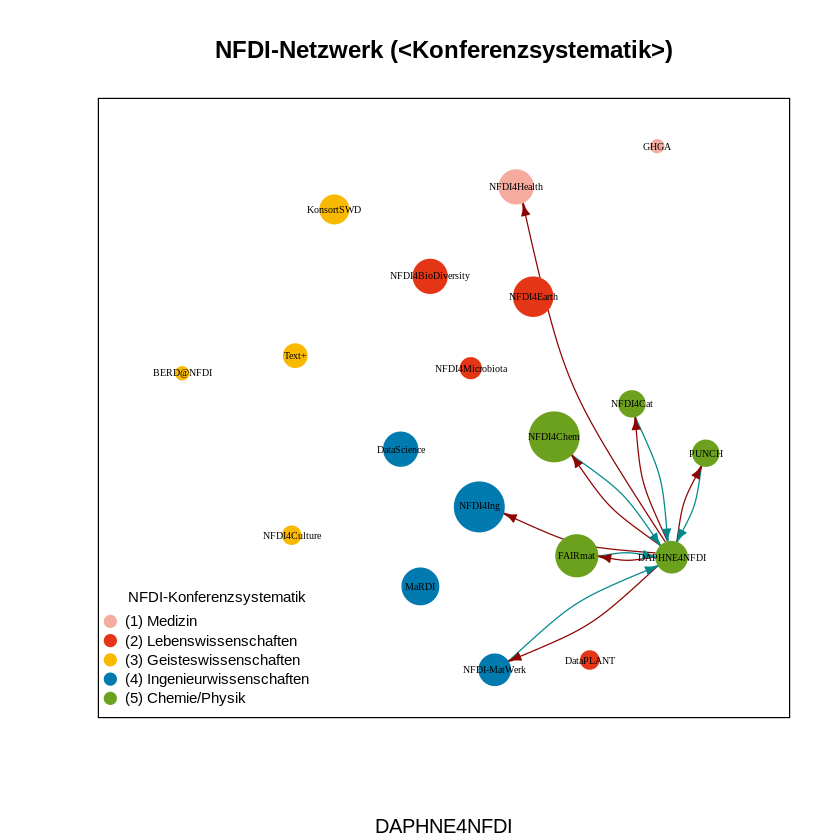

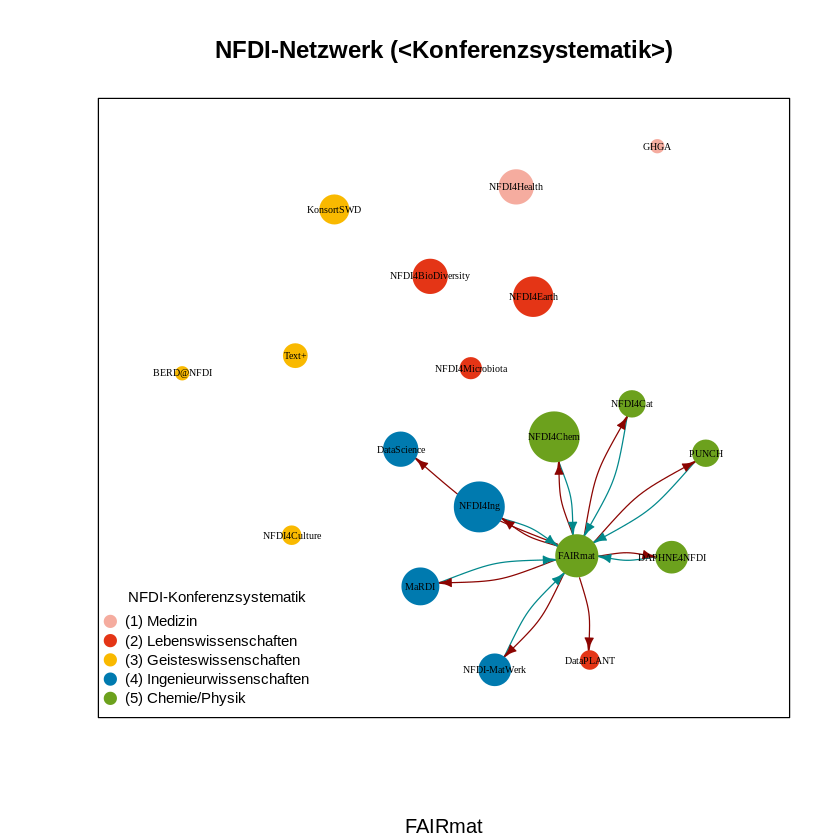

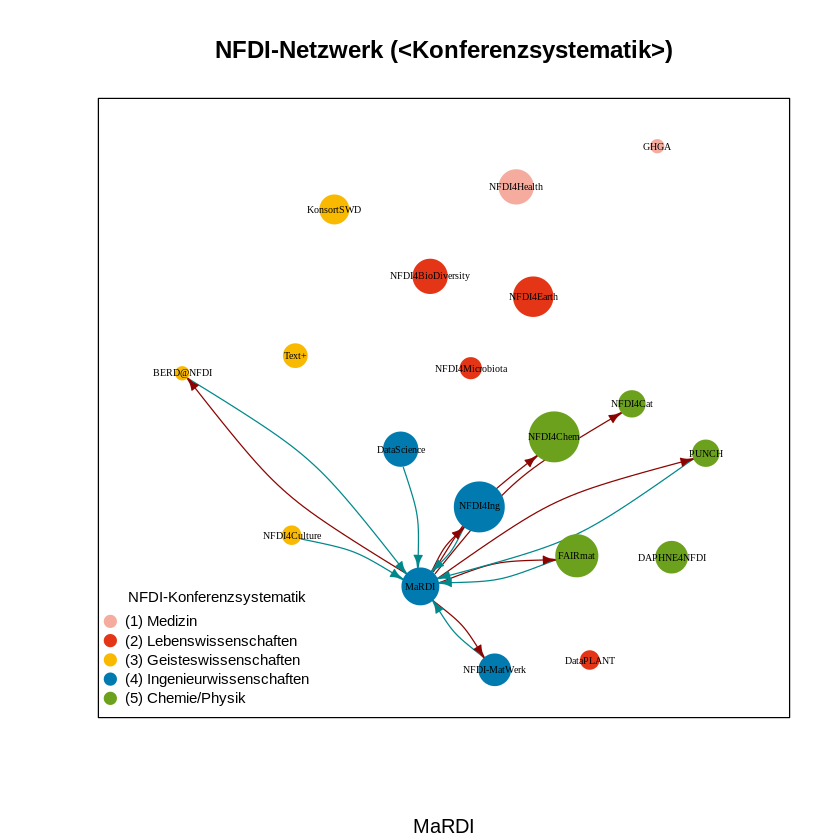

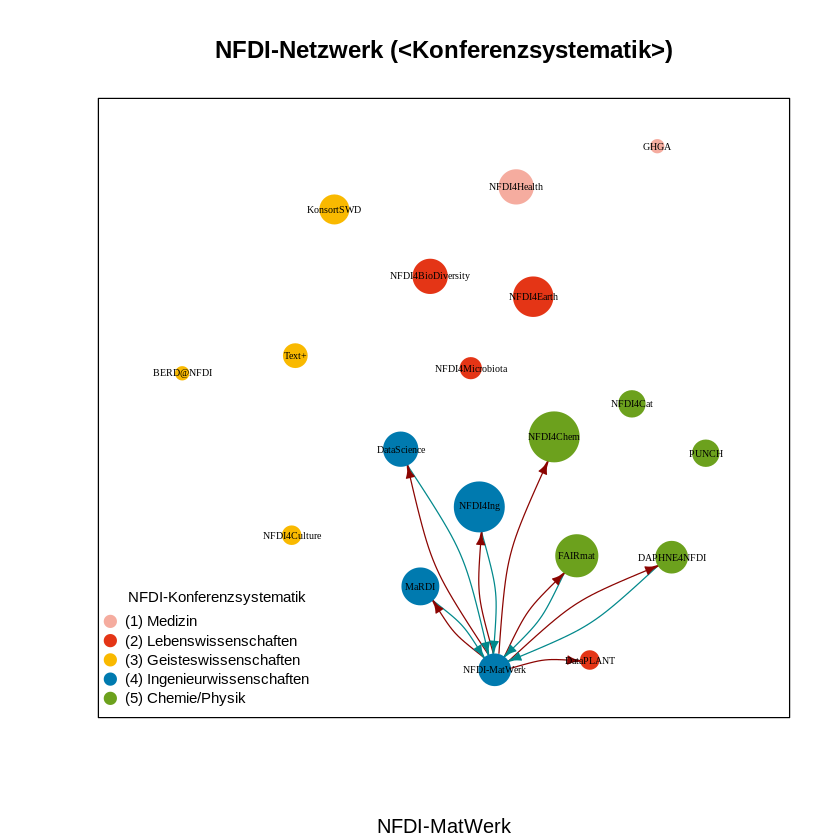

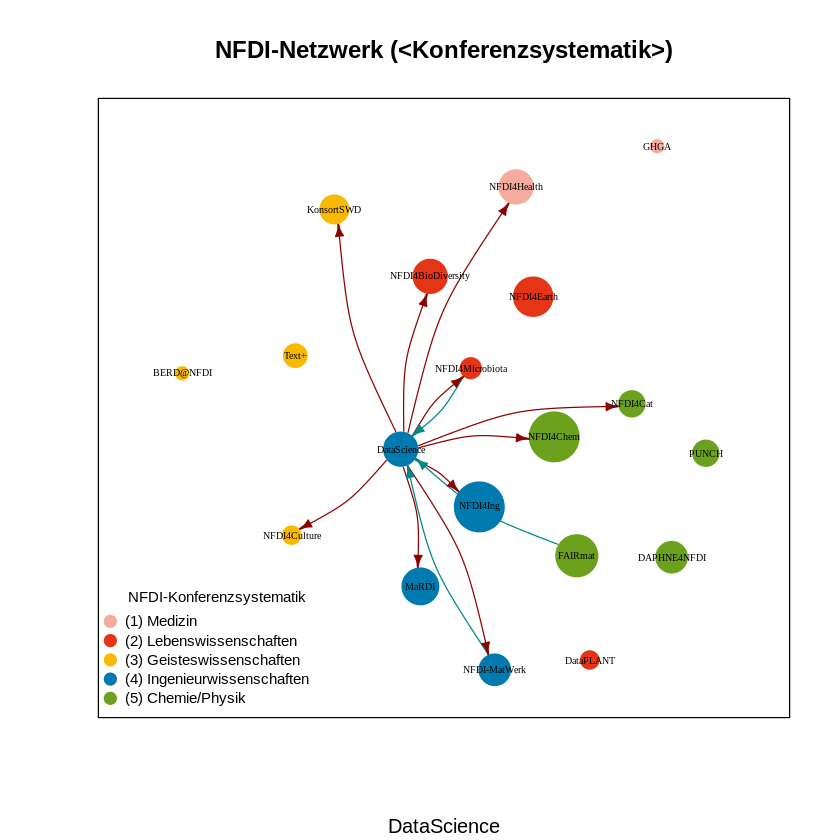

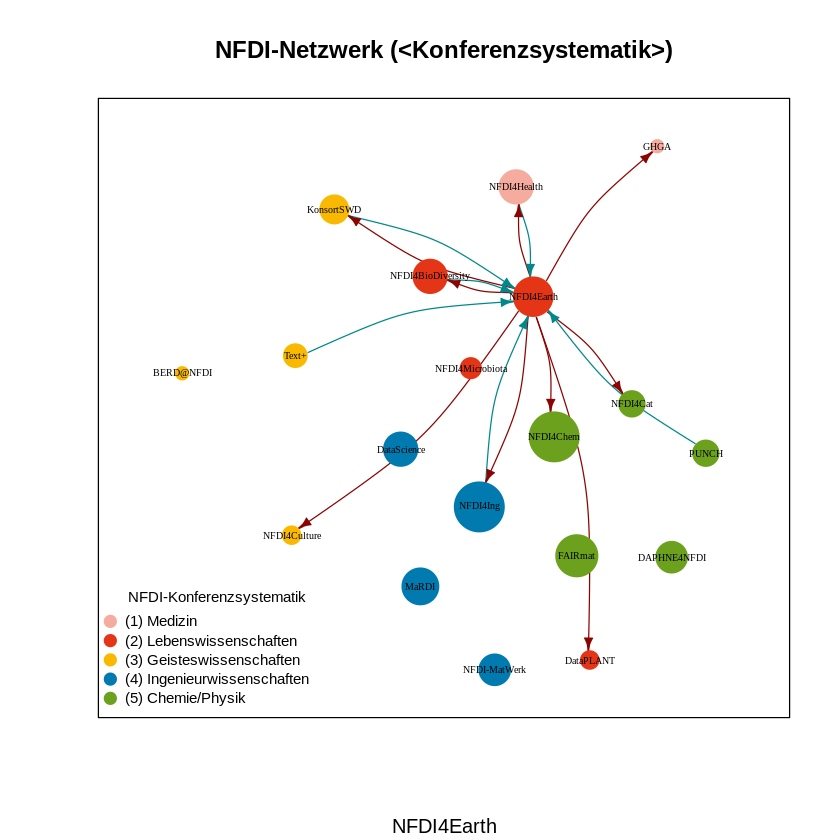

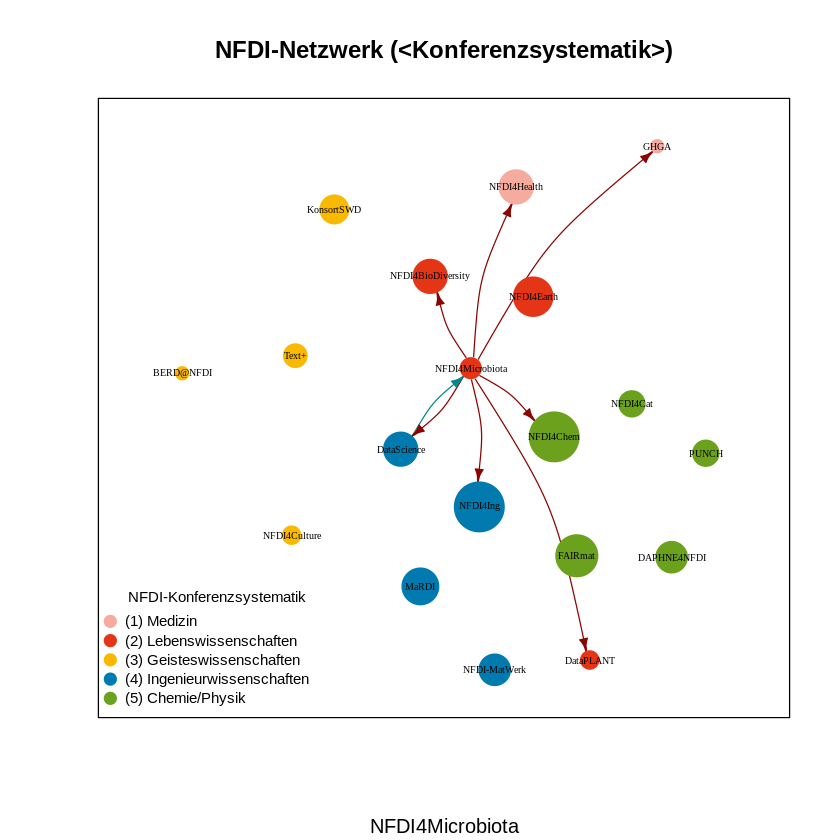

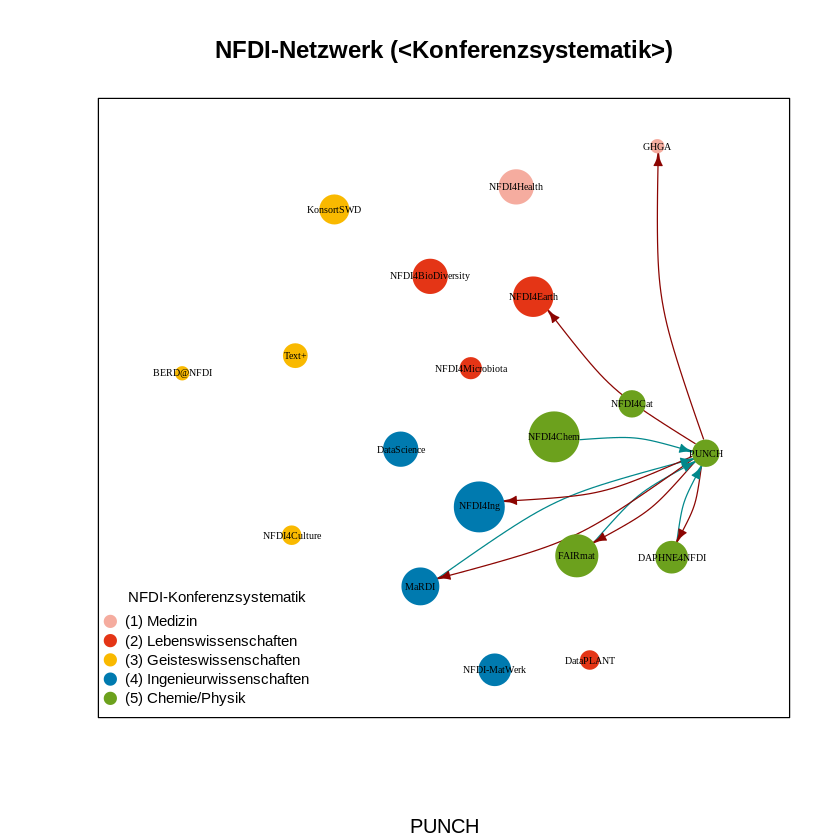

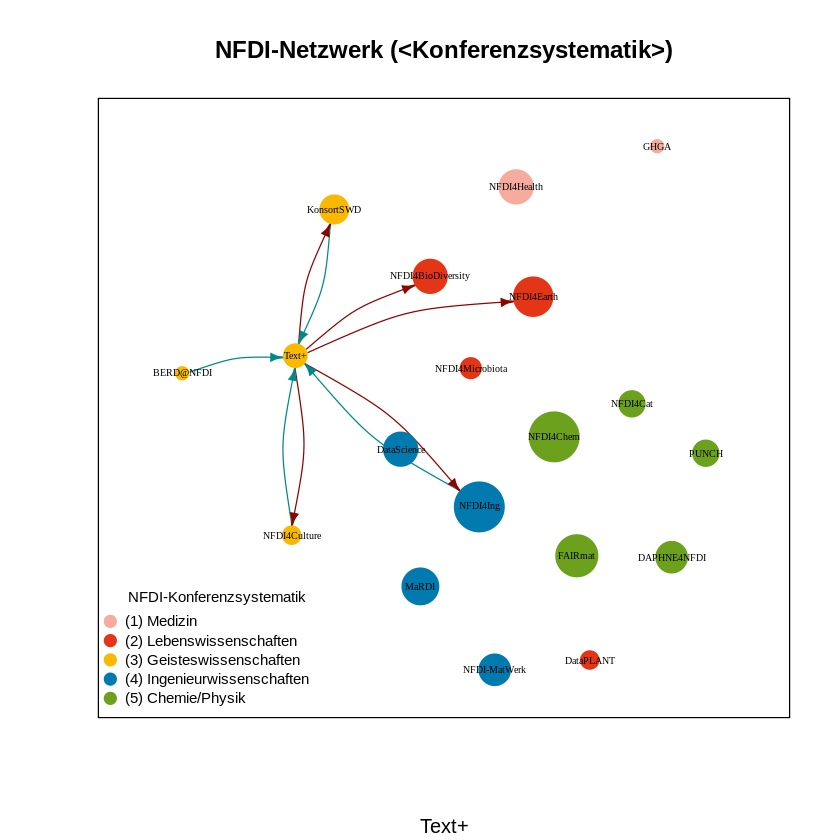

In [82]:
for (name in NFDI_nodes$name){
  nfdi_plot_group(name)
}

# Sicherung, Export und Ausblick

Wir haben die Netzwerkvisualisierung und -analyse nur anhand des Pakets `igraph` gemacht.
Jetzt gilt es noch das Ergebnis zu sichern, bspw. unter "*File*" --> "*Save and Checkpoint*".
Ihr könnt ebenso das JupyterNotebook herunterladen, es stehen verschiedene Formate bereit.

Wenn ihr das Netzwerk mit dem RNoteBook erstellt habt, könnt ihr es über die URL jederzeit wieder aufrufen und ihr könnt weitere Modifikationen im Netzwerk vornehmen.

Es gibt noch weitere spannende Beschäftigungen mit diesem Netzwerk.
Zum Beispiel kann man auch ein interaktives Netzwerk erstellen oder das Netzwerk als Kreisdiagramm darstellen.
Schaut euch dazu die Übersicht auf https://www.r-graph-gallery.com/network.html an.